# Case Study: Milk-Quality Decision tree Classifier

# Dataset : Milk Quality Dataset

# Atrribute Information

    1) pH : This Column defines PH alus of the milk which ranges from 3 to 9.5 max : 6.25 to 6.90

    2) Temprature : This Column defines Temprature of the milk which ranges from 34'C to 90'C max : 34'C to 45.20'C

    3) Taste : This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good) max : 1 (Good)

    4) Odor : This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) max : 0 (Bad)

    5) Fat : This Column defines Odor of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)

    6) Turbidity : This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)

    7) Colour : This Column defines Colour of the milk which ranges from 240 to 255 max : 255

    8)Grade : This Column defines Grade (Target) of the milk which is categorical data Where Low (Bad) or Medium (Moderate) High

# Importing Data

In [1]:
import numpy as np                       # linear algebra
import pandas as pd                      # data processing and Manipulation
import seaborn as sns                    # Data visualization
import matplotlib.pyplot as plt          # Data visualization
import warnings                          # Hiding Warnings
warnings.filterwarnings('ignore')

In [2]:
m=pd.read_csv("C:\\Users\\abhi\\Desktop\\data Analytics course\\Datasets\\milk.csv")

# Exploratory Data Analysis

In [3]:
m.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
m.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
m.size

8472

In [6]:
m.shape

(1059, 8)

In [7]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [8]:
m.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [9]:
m.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [10]:
m.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [11]:
m.Grade.unique()

array(['high', 'low', 'medium'], dtype=object)

# Data Preprocessing

Steps involved in Data Preprocessing :


___*Data cleaning*___

___*Identifying and removing outliers*__

___*Encoding categorical variables*__

In [12]:
#cheacking missing or null values
m.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

pH                AxesSubplot(0.125,0.71587;0.168478x0.16413)
Temprature     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Taste          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Odor           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Fat              AxesSubplot(0.125,0.518913;0.168478x0.16413)
Turbidity     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Colour        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

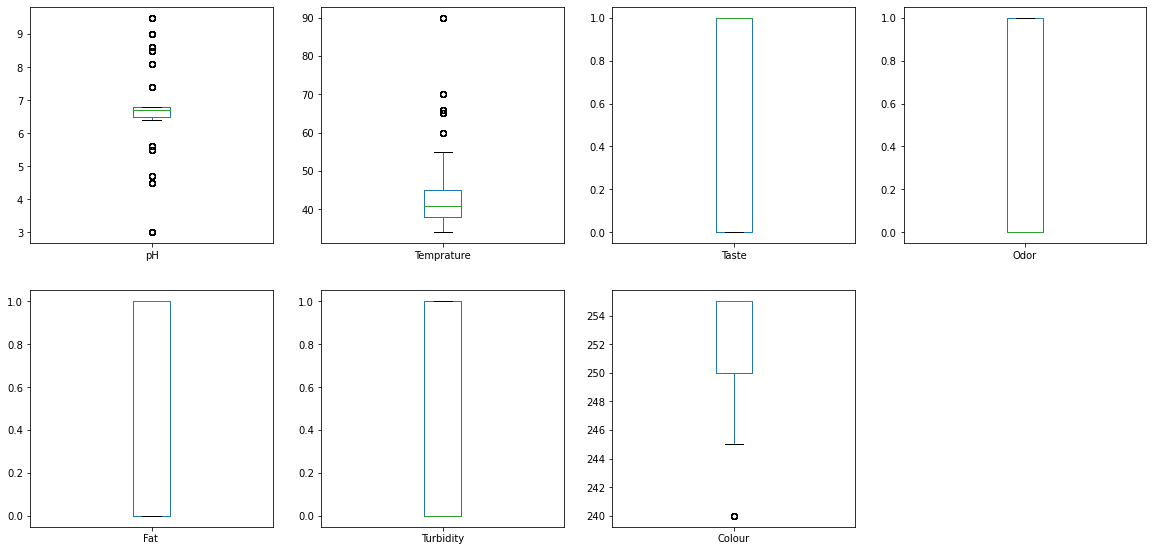

In [13]:
#Outlier Detection
m.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(20,20))

In [14]:
m=m.loc[(m.Temprature<60)]
m=m.loc[(m.pH<8) & (m.pH>6)]


pH                AxesSubplot(0.125,0.71587;0.168478x0.16413)
Temprature     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Taste          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Odor           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Fat              AxesSubplot(0.125,0.518913;0.168478x0.16413)
Turbidity     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Colour        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

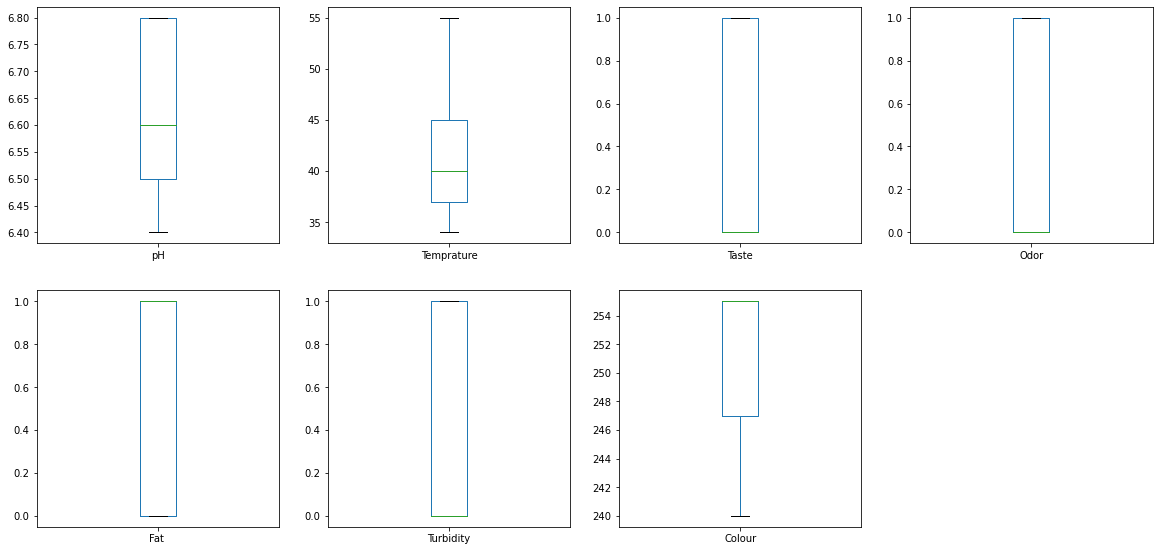

In [15]:
m.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(20,20))

In [16]:
#Checking Multicollinearity
m.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.385169,-0.032990,0.307743,0.193007,0.164494,-0.246377
Temprature,0.385169,1.000000,-0.024248,0.261950,-0.016876,0.208823,-0.205965
Taste,-0.032990,-0.024248,1.000000,0.150298,0.370760,-0.097593,-0.154204
Odor,0.307743,0.261950,0.150298,1.000000,0.345004,0.427383,-0.173333
Fat,0.193007,-0.016876,0.370760,0.345004,1.000000,0.136009,0.111634
Turbidity,0.164494,0.208823,-0.097593,0.427383,0.136009,1.000000,0.066738
Colour,-0.246377,-0.205965,-0.154204,-0.173333,0.111634,0.066738,1.000000


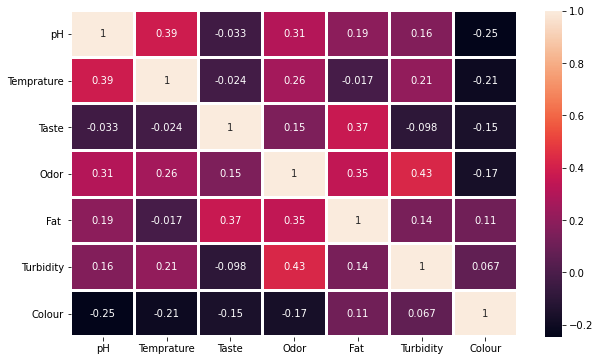

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(m.corr(),annot=True,linewidth=2)
plt.show()

In [18]:
m.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
9,6.7,45,1,1,0,0,247,medium


In [19]:
m.Grade.unique()

array(['high', 'medium', 'low'], dtype=object)

In [20]:
#Feature Engineering
m.Grade=m.Grade.map({"low":0,"medium":1,"high":2})

In [21]:
m.Grade.unique()

array([2, 1, 0], dtype=int64)

#  Data Visualization

array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Temprature'}>,
        <AxesSubplot:title={'center':'Taste'}>],
       [<AxesSubplot:title={'center':'Odor'}>,
        <AxesSubplot:title={'center':'Fat '}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Colour'}>,
        <AxesSubplot:title={'center':'Grade'}>, <AxesSubplot:>]],
      dtype=object)

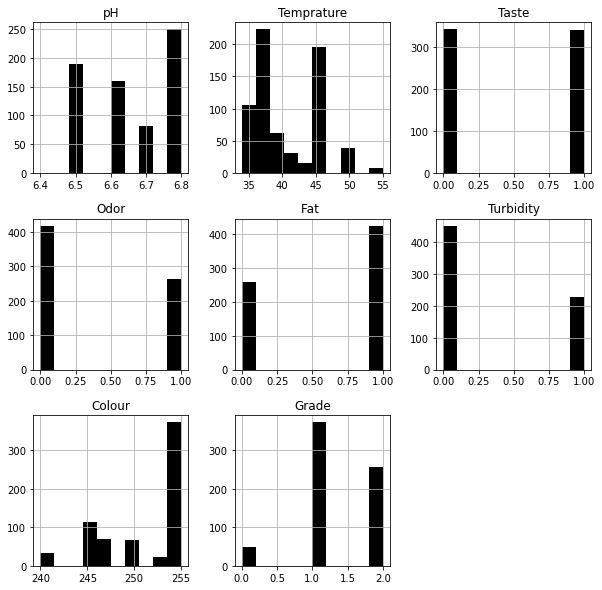

In [22]:
m.hist(figsize=(10,10),color="black")

<AxesSubplot:>

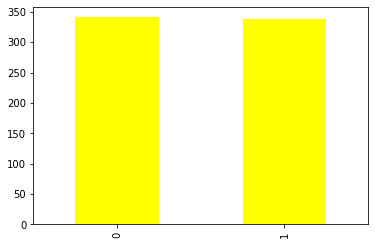

In [23]:
m.Taste.value_counts().plot(kind="bar",color="yellow")

<AxesSubplot:>

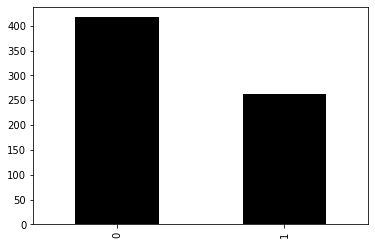

In [24]:
m.Odor.value_counts().plot(kind="bar",color="black")

<AxesSubplot:>

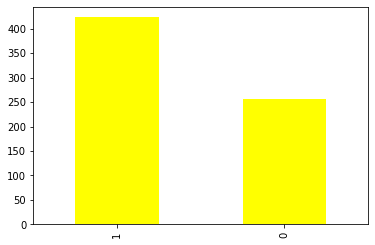

In [25]:
m["Fat "].value_counts().plot(kind="bar",color="yellow")

<AxesSubplot:>

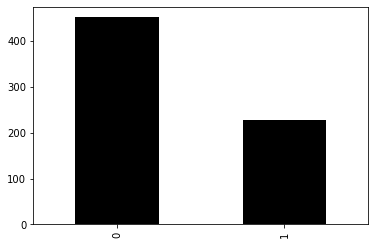

In [26]:
m.Turbidity.value_counts().plot(kind="bar",color="black")

<AxesSubplot:>

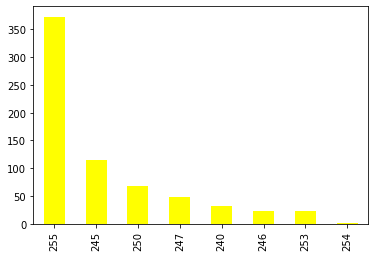

In [27]:
m.Colour.value_counts().plot(kind="bar",color="yellow")

<AxesSubplot:xlabel='Grade'>

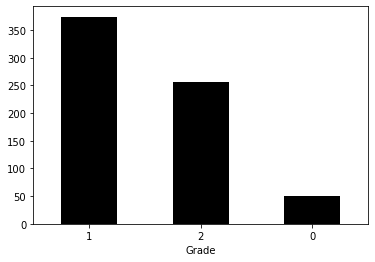

In [28]:
m.Grade.value_counts().plot(kind="bar",color="black",rot=360,xlabel="Grade")

<AxesSubplot:xlabel='Temprature', ylabel='Colour'>

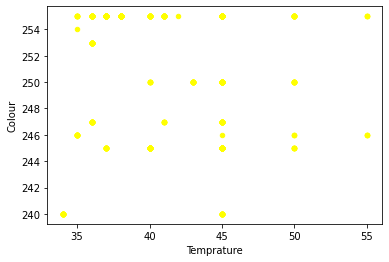

In [29]:
m.plot(kind="scatter",x= "Temprature",y="Colour",color="yellow")

<AxesSubplot:>

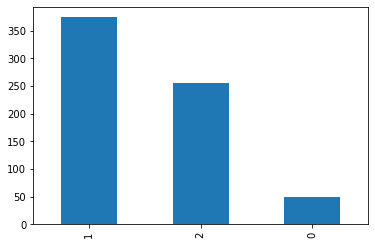

In [30]:
m.Grade.value_counts().plot(kind="bar")

# Splitting data into dependent and independent variable

In [31]:
x=m.drop(["Grade"],axis=1)
y=m.Grade

In [32]:
x.head(n=3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
4,6.6,37,0,0,0,0,255


In [33]:
y.head(n=3)

0    2
1    2
4    1
Name: Grade, dtype: int64

In [34]:
y.value_counts()

1    374
2    256
0     50
Name: Grade, dtype: int64

# Balancing Data

In [35]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,Y_res=sm.fit_resample(x,y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(Y_res))

original dataset shape: Counter({1: 374, 2: 256, 0: 50})
Resample dataset shape Counter({2: 374, 1: 374, 0: 374})


# Splitting Data into train test

__*Now I split variable into training and testing sets. I will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of data in train dataset and the rest 30% in test dataset.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res, test_size=0.3, random_state=90)

In [38]:
X_train.shape, X_test.shape

((785, 7), (337, 7))

In [39]:
y_train.shape, y_test.shape

((785,), (337,))

# feature scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(785, 7)

# Building a DecisionTreeClassifier Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=dt.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9910979228486647

In [46]:
precision_score(y_test,y_pred,average="weighted")

0.9910977150504118

In [47]:
recall_score(y_test,y_pred,average="weighted")

0.9910979228486647

In [48]:
#Evaluation report model
grade = ['high','medium', 'low']

print('Classsification Report Model : \n')
print(classification_report(y_test, y_pred, target_names=grade))

Classsification Report Model : 

              precision    recall  f1-score   support

        high       0.99      0.99      0.99        98
      medium       0.99      1.00      1.00       119
         low       0.99      0.98      0.99       120

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337



In [49]:
#Plotting Decision tree

In [50]:
from sklearn.tree import export_text
from sklearn import tree

In [51]:
text_representation=tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 0.31
|   |--- feature_4 <= -0.24
|   |   |--- feature_3 <= 0.28
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.28
|   |   |   |--- feature_5 <= 0.28
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.28
|   |   |   |   |--- class: 0
|   |--- feature_4 >  -0.24
|   |   |--- feature_3 <= 0.28
|   |   |   |--- feature_0 <= -0.89
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.89
|   |   |   |   |--- feature_0 <= 0.88
|   |   |   |   |   |--- feature_2 <= 0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.13
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  0.88
|   |   |   |   |   |--- feature_1 <= -0.28
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.28
|   |   |   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  

In [52]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
from sklearn.tree import plot_tree

In [54]:
m.head(n=2)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2


In [55]:
feature_name=['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Color']
ca=["2","1","0"]

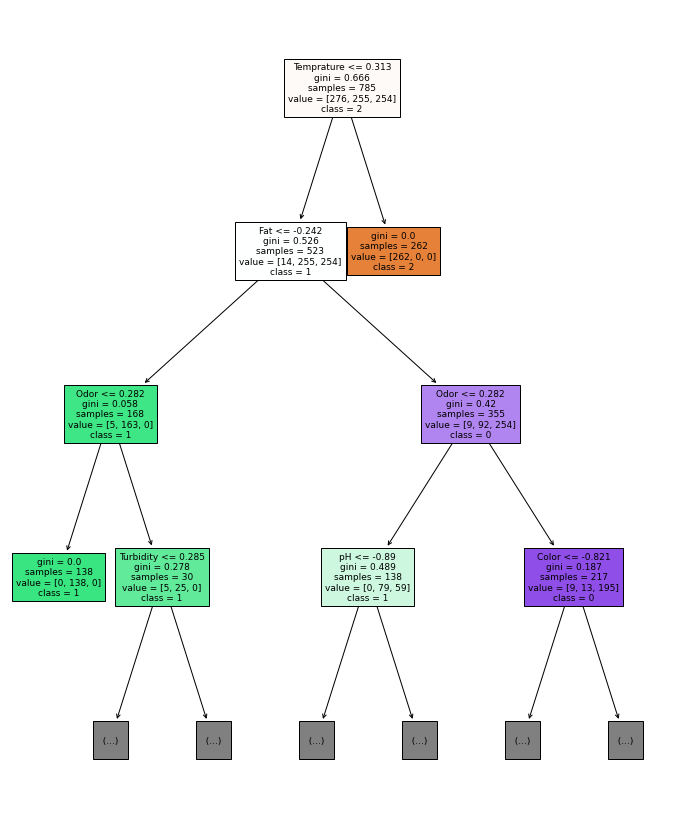

In [56]:
plt.figure(figsize=(12,15))
a=plot_tree(dt,max_depth=3,fontsize=9,feature_names=feature_name,class_names=ca,filled=True)
plt.show()

In [57]:
#Entering new data to get milk quality grade

pH = float(input('Input PH = '))
Temprature = float(input('Input Temprature = '))
Taste = bool(input('Input Taste (True or False) = '))
Odor = bool(input('Input Odor (True or False) = '))
Fat = bool(input('Input Fat (True or False) = '))
Turbidity = bool(input('Input Turbidity (True or False) = '))
Colour= int(input('Input Colour = '))
grade_milk = [[pH, Temprature, Taste, Odor, Fat, Turbidity, Colour]]

predict_data=dt.predict(grade_milk)
print('Quality of the milk', predict_data)

if predict_data==[0]:
    print("Quality of a milk is Low")
elif predict_data==[1]:
    print(" Quality of milk is Medium")
else:
    print("Quality of milk is High")
    

Input PH = 5.6
Input Temprature = 33
Input Taste (True or False) = 0
Input Odor (True or False) = 1
Input Fat (True or False) = 0
Input Turbidity (True or False) = 1
Input Colour = 250
Quality of the milk [0]
Quality of a milk is Low
